In [17]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [6]:
image_exts = ['jpeg', 'jpg', 'png']

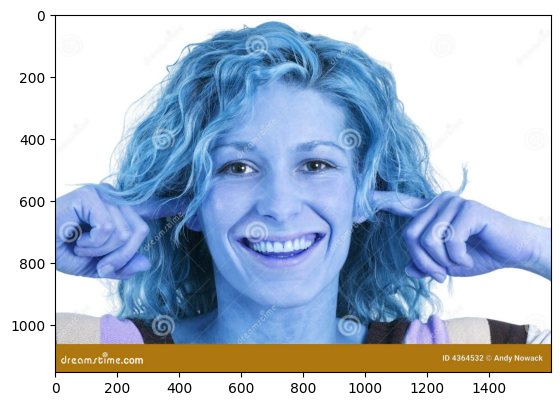

In [21]:
image_exts[2]
data_dir = 'data'
example_img = os.listdir(os.path.join(data_dir, 'happy'))[18]
example_img_path = os.path.join(data_dir, 'happy', example_img)
example_img = cv2.imread(example_img_path)
plt.imshow(example_img)

In [22]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, img_class)):
    img_path = os.path.join(data_dir, img_class, image)
    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(img_path))
        os.remove(img_path)
    except Exception as e:
      print("Issue with image {}".format(img_path))



Image not in ext list data/sad/depressed-sad-young-woman-sitting-260nw-2355353189.jpg
Image not in ext list data/sad/many-sad-faces-our-group-260nw-51922987(1).jpg
Image not in ext list data/sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list data/sad/young-handsome-man-beard-wearing-260nw-1654470865.jpg
Image not in ext list data/sad/depressed-sad-young-woman-sitting-260nw-2355353189(1).jpg
Image not in ext list data/sad/article-2029228-01C3E98B000004B0-620_233x423.jpg
Image not in ext list data/sad/vector6.svg
Image not in ext list data/sad/young-handsome-man-beard-wearing-260nw-1654470865(1).jpg
Image not in ext list data/sad/reflection-train-carriage-window-beautiful-260nw-2450542421(1).jpg
Image not in ext list data/sad/smQxqvj(1).jpeg
Image not in ext list data/sad/vector3.svg
Image not in ext list data/sad/injured-woman-bruise-on-face-260nw-1737953294.jpg
Image not in ext list data/sad/depositphotos_23624987-stock-photo-beauty-girl-cry.jpg
Image not in ext list data/s

In [23]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 995 files belonging to 2 classes.


In [24]:
data_iterator = data.as_numpy_iterator()

In [25]:
batch = data_iterator.next()

In [33]:
batch[0].shape

(32, 256, 256, 3)

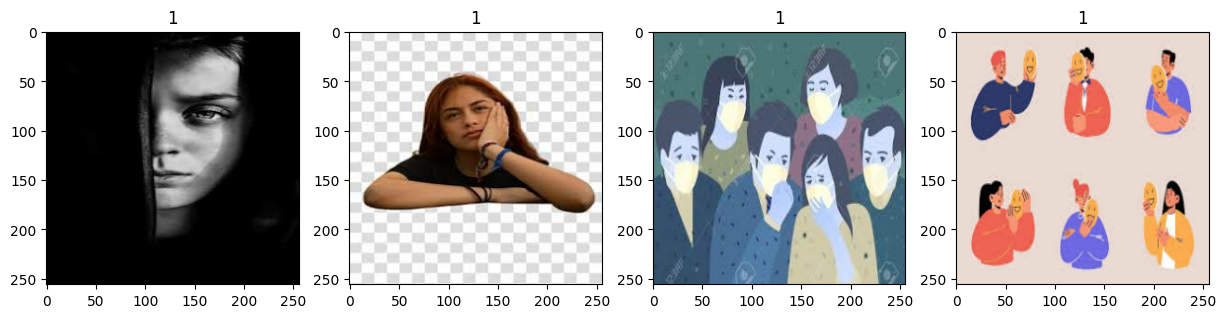

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])